# Complete Data Analysis : Supermarket Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
SuperMarketData = pd.read_csv('supermarket_sales - Sheet1.csv', encoding='latin')

In [3]:
SuperMarketData.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# EDA(Exploratory Data Analysis)
 


In [4]:
SuperMarketData.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
SuperMarketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
SuperMarketData.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There is no any null value present in any features  

# Droping Useless Featues
Here some features are useless for our Analysis so we are droping them 


In [7]:
SuperMarketData = SuperMarketData.drop(['Invoice ID','Date','Time'], axis = 1)

#### After observing each features head and tail we come to know "gross margin percentage" has only single value 4.76190476

In [8]:
SuperMarketData['gross margin percentage'].unique()

array([4.76190476])

so feature 'gross margin percentage' is not usefull for us so we are droping that to 

In [9]:
SuperMarketData = SuperMarketData.drop(['gross margin percentage'], axis = 1)

In [10]:
SuperMarketData.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


# Data Visualisation

In [11]:
print(SuperMarketData.shape)
SuperMarketData['Gender'].value_counts()

(1000, 13)


Female    501
Male      499
Name: Gender, dtype: int64

here we can see count of both male and female is nearly similar 

C:\Users\asd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

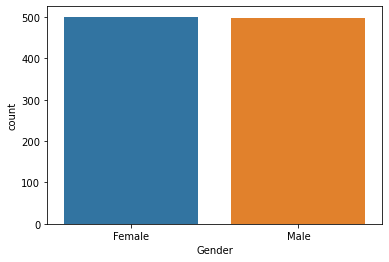

In [12]:
sns.countplot('Gender',data=SuperMarketData)

for easy analysis we will create Dummies of "Gender" feature 


In [13]:
gender_dummies  = pd.get_dummies(SuperMarketData['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [14]:
SuperMarketData = pd.concat([SuperMarketData, gender_dummies], axis = 1)
SuperMarketData.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


<b>Now we will compare Gender wise Product line </b>
* By which we can understand which product line is famous in Females and which in males 

<AxesSubplot:xlabel='Product line', ylabel='Female'>

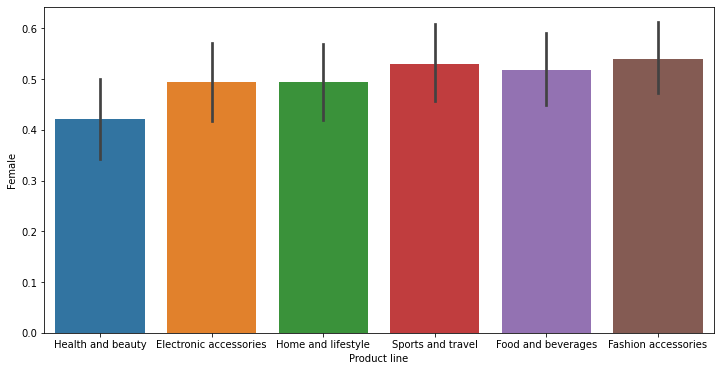

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = SuperMarketData)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

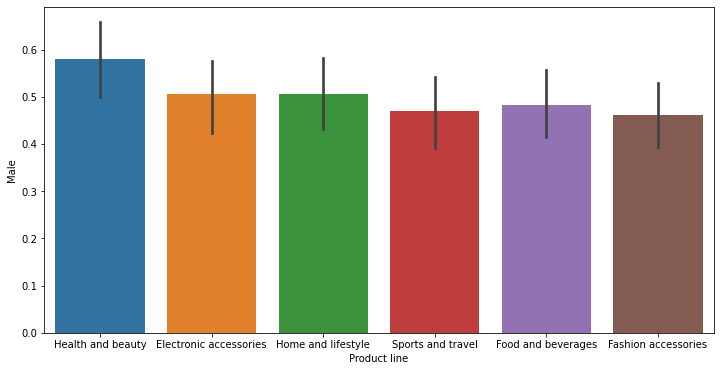

In [16]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Male', data = SuperMarketData)

#### Conculsion
* As per the BarPlots we can see <b>Fashion Accessories</b> product line sales is more in Females 
* In Males <b>Health and beauty</b> product lines sales is high  

# Plotting Customers per City

In [17]:
place = pd.DataFrame(SuperMarketData['City'].value_counts())
place

,City
Yangon,340
Mandalay,332
Naypyitaw,328


<AxesSubplot:ylabel='City'>

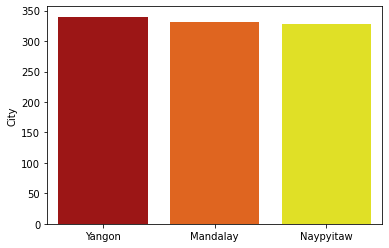

In [18]:
sns.barplot(x = place.index  , y = place['City'], palette = 'hot')

Looking at cities we can say that all cities has nearly equal distribution of sales 

# Analysis Based on <b>Payment Method</b>

In [19]:
payment_df = pd.DataFrame(SuperMarketData['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


<AxesSubplot:ylabel='Payment'>

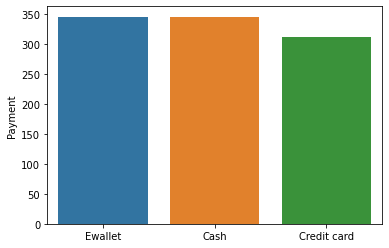

In [20]:
sns.barplot(x =payment_df.index , y = payment_df.Payment)

# Lets Check which Product Line returns high Gross Income 


<AxesSubplot:xlabel='Product line', ylabel='gross income'>

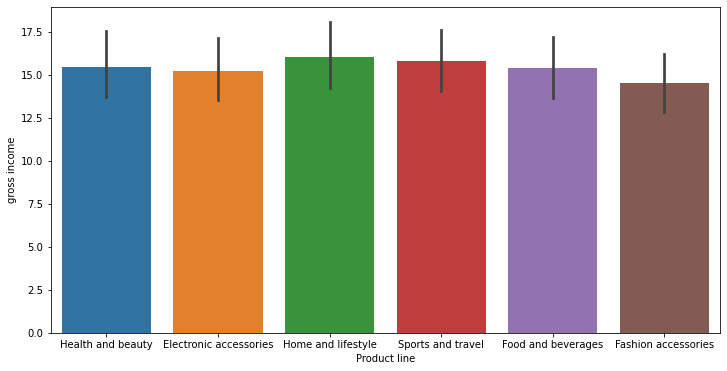

In [23]:
plt.figure(figsize= (12,6))
sns.barplot(x = SuperMarketData['Product line'], y = SuperMarketData['gross income'])

After Observing BarPlot we Can Say <b>Home and Lifestyle</b> is highest gross income returing Productline

# Getting Rating Plot for each product line

([<matplotlib.axis.XTick at 0x25f109fc70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

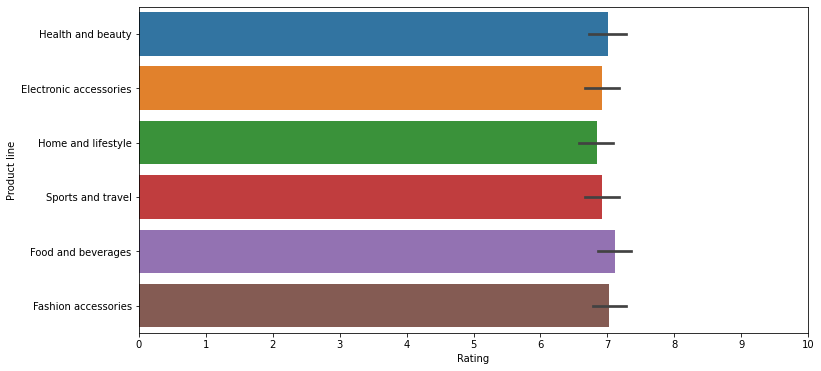

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(y = SuperMarketData['Product line'], x = SuperMarketData['Rating'])
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.xticks(xdata)

# Total bill in each product line

<AxesSubplot:xlabel='Total', ylabel='Product line'>

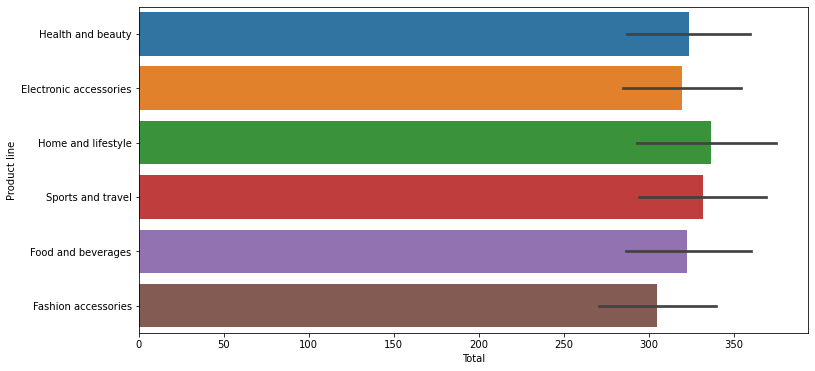

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(x = SuperMarketData['Total'] , y = SuperMarketData['Product line'])

(array([112.,  91.,  90., 109., 102.,  98., 102.,  85.,  92., 119.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

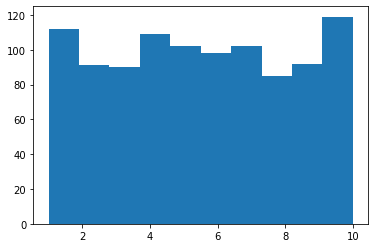

In [36]:
plt.hist(SuperMarketData['Quantity'])

C:\Users\asd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x25f22f6160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

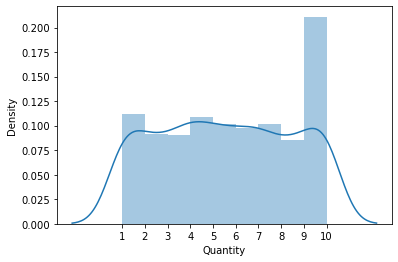

In [39]:
sns.distplot(SuperMarketData['Quantity'])
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(xdata)

In [42]:
quantity_df =pd.DataFrame(SuperMarketData['Quantity'].value_counts())
quantity_df

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:ylabel='Quantity'>

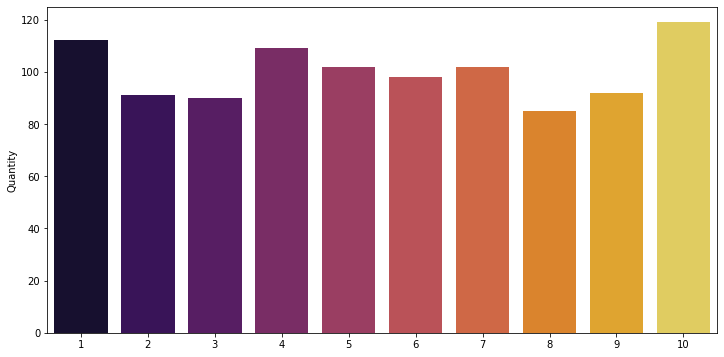

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x = quantity_df.index , y = quantity_df['Quantity'] , palette = 'inferno')

# Plotting heatmap to check if any correlation between columns

<AxesSubplot:>

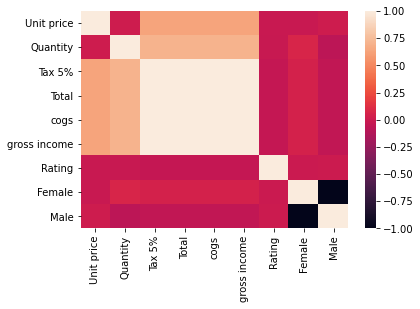

In [45]:
sns.heatmap(SuperMarketData.corr())

# Conclusion of Analysis 
* Total Customers = 1000
* Total Females = 501
* Total Males = 499
* Min Rating = 4
* Max Rating = 10
* Average Rating = 6.97
* Best Average Rating in Food & Beverages
* Max Average Gross Income in Home & Lifestyle
* Min Average Gross Income in Fashion Accessories
* Maximum customers buys 10 quantities
* Max Average total bill in Home and lifestyle
* Min Average total bill in Fashion Accessories
* Maximum People pays through e-wallet
* Maximum people comes from Yangon City
* Max Average Sales of Fashion Accessories is from Females
* Max Average Sales of Health & Beauty is from Males